# Statistics in Python

1. Analyzing Frequency Distributions
2. Mean
3. Mode
4. Median
5. STD
6. Correlation
7. Pairwise
8. Z-Scores

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

### Let's use our pandas skills to create a column labelling quality with either good or bad

But first, let's look the quality scores distribution

<AxesSubplot: xlabel='quality', ylabel='Count'>

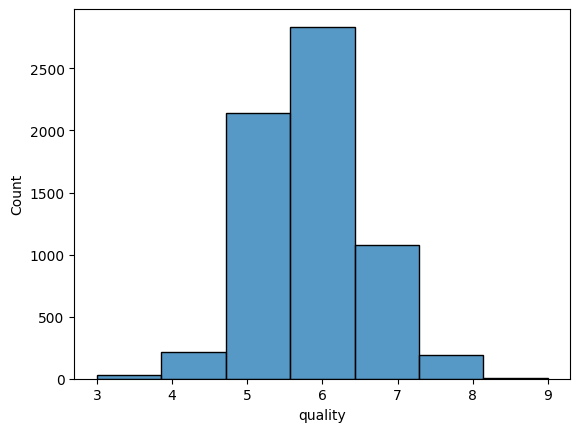

In [3]:
import seaborn as sns

sns.histplot(df['quality'], bins=7, kde=False)

In [4]:
# Let's use 6 as the threshold for good
df['rating'] = df['quality'].apply(lambda x: 'good' if x >= 6 else 'bad')
df.head(15)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   white            7.0              0.27         0.36           20.70   
1   white            6.3              0.30         0.34            1.60   
2   white            8.1              0.28         0.40            6.90   
3   white            7.2              0.23         0.32            8.50   
4   white            7.2              0.23         0.32            8.50   
5   white            8.1              0.28         0.40            6.90   
6   white            6.2              0.32         0.16            7.00   
7   white            7.0              0.27         0.36           20.70   
8   white            6.3              0.30         0.34            1.60   
9   white            8.1              0.22         0.43            1.50   
10  white            8.1              0.27         0.41            1.45   
11  white            8.6              0.23         0.40            4.20   
12  white            7.9              0.18         0.37            1.20   
13  white            6.6              0.16         0.40            1.50   
14  white            8.3              0.42         0.62           19.25   

    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0       0.045                 45.0                 170.0   1.0010  3.00   
1       0.049                 14.0                 132.0   0.9940  3.30   
2       0.050                 30.0                  97.0   0.9951  3.26   
3       0.058                 47.0                 186.0   0.9956  3.19   
4       0.058                 47.0                 186.0   0.9956  3.19   
5       0.050                 30.0                  97.0   0.9951  3.26   
6       0.045                 30.0                 136.0   0.9949  3.18   
7       0.045                 45.0                 170.0   1.0010  3.00   
8       0.049                 14.0                 132.0   0.9940  3.30   
9       0.044                 28.0                 129.0   0.9938  3.22   
10      0.033                 11.0                  63.0   0.9908  2.99   
11      0.035                 17.0                 109.0   0.9947  3.14   
12      0.040                 16.0                  75.0   0.9920  3.18   
13      0.044                 48.0                 143.0   0.9912  3.54   
14      0.040                 41.0                 172.0   1.0002  2.98   

    sulphates  alcohol  quality rating  
0        0.45      8.8        6   good  
1        0.49      9.5        6   good  
2        0.44     10.1        6   good  
3        0.40      9.9        6   good  
4        0.40      9.9        6   good  
5        0.44     10.1        6   good  
6        0.47      9.6        6   good  
7        0.45      8.8        6   good  
8        0.49      9.5        6   good  
9        0.45     11.0        6   good  
10       0.56     12.0        5    bad  
11       0.53      9.7        5    bad  
12       0.63     10.8        5    bad  
13       0.52     12.4        7   good  
14       0.67      9.7        5    bad

## Understanding lambda functions

lambda: arguements : expression



In [5]:
# Let's make a function that multiples our input arguments by 2

our_lambda_function = lambda x : x * 2
our_lambda_function(5)

10

In [6]:
# It's the short hand equivilent to:

def multiple_by_two(x):
  return x * 2

multiple_by_two(5)

10

In [7]:
# In the lambda case we write 'lambda arguments: expression'
# In our regular function we write 'def function(arguements): return expression'

## Let's go back to our plot

<AxesSubplot: xlabel='type', ylabel='count'>

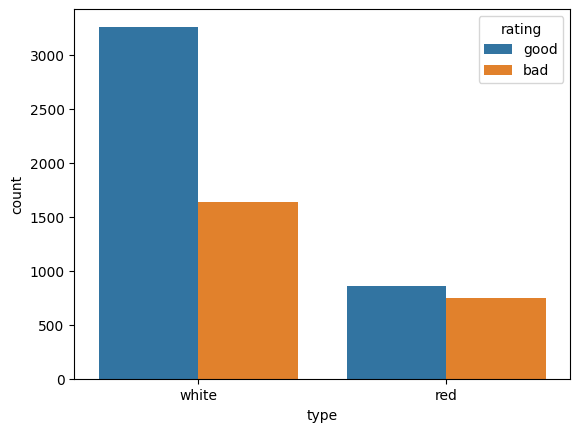

In [8]:
sns.countplot(x = 'type', hue = 'rating', data = df)

<AxesSubplot: xlabel='quality', ylabel='count'>

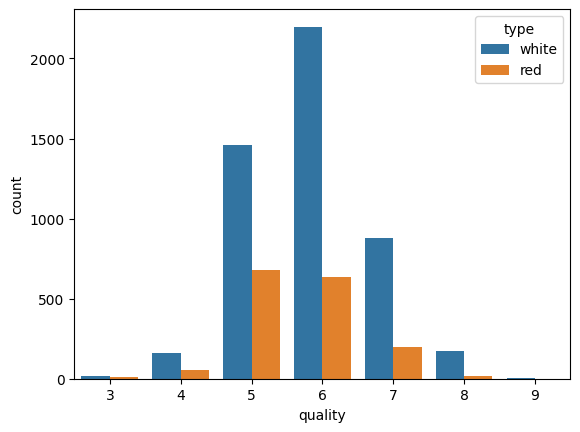

In [9]:
sns.countplot(x = df.quality, data=df, hue='type')

# Let's compare things a bit more and get a better picture of the difference between red and white wines usign Boxplots

![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)

In [10]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'rating'],
      dtype='object')

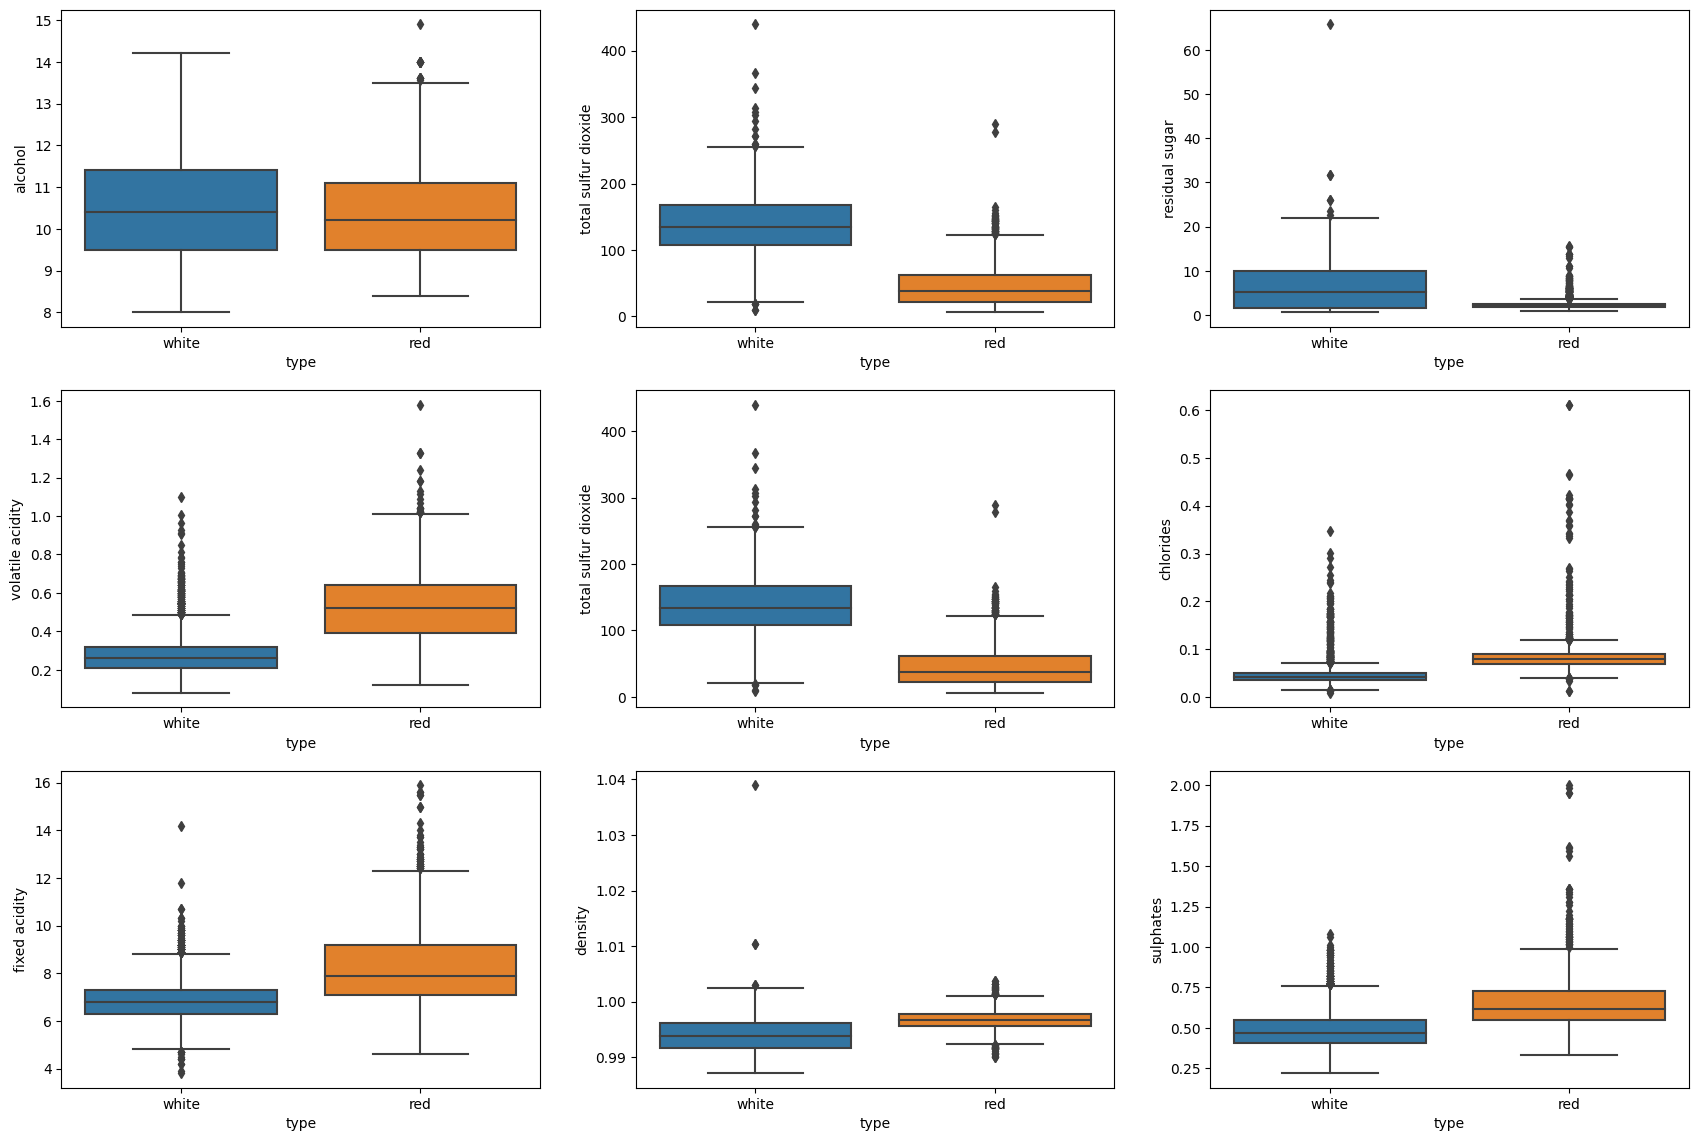

In [11]:

# Let's define the size of our ploting output (make it big since we're doing 8 plots)
fig = plt.figure(figsize=(21,14))

# Store the features or columns we're going to plot in a list
features = ["alcohol", "total sulfur dioxide", "residual sugar", "volatile acidity", 
            "total sulfur dioxide", "chlorides", "fixed acidity", "density","sulphates"]

# Loop through our features plotting each plot in our loop
for (i, feature) in enumerate(features):
    # How do subplots work?
    # add_subplot(rows, columns, figure_number)
    # We need to create a subplot object to store our plots
    ax1 = fig.add_subplot(3,3,i+1)
    sns.boxplot(x="type", y=feature, data=df);

In [16]:
# Let's understand firstly how we used enumerate

# Make a generic list
list_of_names = ["Rajeev", "Nidia", "Sam"]

# our variable used in the loop is name, name will take on each item in list_of_names in each iteration
# using enumerate, allows us to have a variable called i in the loop, i will increase incremently for each iteration
for (i, name) in enumerate(list_of_names):
  print(i, name)

0 Rajeev
1 Nidia
2 Sam


In [0]:
# having i increment each iteration is useful as it allows us to loop through the index of another list 
list_of_names = ["Rajeev", "Nidia", "Sam"]
list_of_numbers = [1,2,3,4,5,6,7]

for (i, name) in enumerate(list_of_names):
  print(i, name, list_of_numbers[i])

0 Rajeev 1
1 Nidia 2
2 Sam 3


In [12]:
# Showing the quartile ranges of alcohol content

df[df['type'] == 'red']['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

E:\codes\python\Journey Data Analysis & Machine Learning\ML ENVIRONMENT\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot: xlabel='alcohol'>

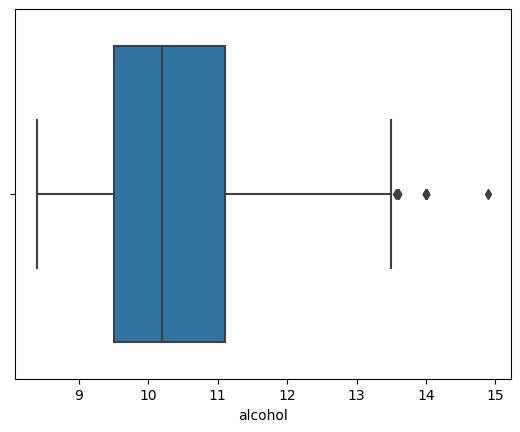

In [23]:
sns.boxplot(x = df[df['type'] == 'red']['alcohol'],orient="v")
# x=df[df['type'] == 'red']['alcohol']
# sns.boxplot(x=x, data= df,orient="v")

# Finding the Mean, Mode and Median

In [3]:
# Let's load our Titantic dataset

import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/titanic.csv"
df = pd.read_csv(file_name)

df.head()

pclass                                             name  ... embarked  survived
0       1                    Allen, Miss. Elisabeth Walton  ...        S         1
1       1                   Allison, Master. Hudson Trevor  ...        S         1
2       1                     Allison, Miss. Helen Loraine  ...        S         0
3       1             Allison, Mr. Hudson Joshua Creighton  ...        S         0
4       1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  ...        S         0

[5 rows x 11 columns]

In [6]:
df.describe()

pclass          age  ...         fare     survived
count  1309.000000  1046.000000  ...  1308.000000  1309.000000
mean      2.294882    29.881135  ...    33.295479     0.381971
std       0.837836    14.413500  ...    51.758668     0.486055
min       1.000000     0.166700  ...     0.000000     0.000000
25%       2.000000    21.000000  ...     7.895800     0.000000
50%       3.000000    28.000000  ...    14.454200     0.000000
75%       3.000000    39.000000  ...    31.275000     1.000000
max       3.000000    80.000000  ...   512.329200     1.000000

[8 rows x 6 columns]

In [8]:
# Let's make a simple function you an use to return the mode

def getMode(dataset, feature):
  return dataset[feature].value_counts().index[0]

getMode(df, 'pclass')

24.0

In [9]:
# Trying it for sex

getMode(df, 'sex')

'male'

In [0]:
# Trying it for age

getMode(df, 'age')

24.0

# Finding the Median

In [10]:
# Note only works for numeric data

df.median()

pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
survived     0.0000
dtype: float64

# Getting the Mean, Median and Mode

In [11]:
print("Mean = " + str(df['age'].mean()))
print("Median = " + str(df['age'].median()))
print("Mode = " + str(getMode(df, 'age')))

Mean = 29.8811345124283
Median = 28.0
Mode = 24.0


In [0]:
print(df['alcohol'].max())
print(df['alcohol'].min())

# Standard Deviation

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

1.1927117488689747
10.491800831149511


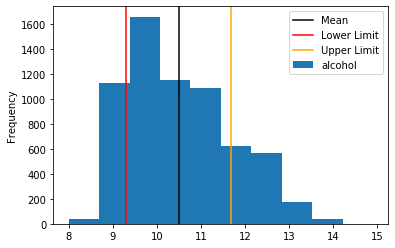

In [16]:
mean = df['alcohol'].mean()
st_dev = df['alcohol'].std()
df['alcohol'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Lower Limit')
plt.axvline(mean + st_dev, color = 'Orange', label = 'Upper Limit')
plt.legend()
print(st_dev)
print(mean)

1.4225613158900883
10.491800831149511


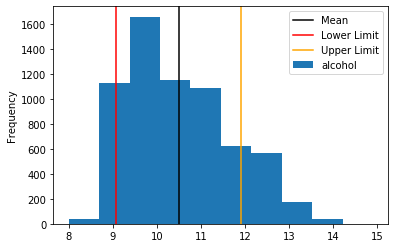

In [17]:
mean = df['alcohol'].mean()
variance = df['alcohol'].var()
df['alcohol'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - variance, color = 'Red', label = 'Lower Limit')
plt.axvline(mean + variance, color = 'Orange', label = 'Upper Limit')
plt.legend()
print(variance)
print(mean)

STD vs VAR?
http://www.leeds.ac.uk/educol/documents/00003759.htm

# Correlation Matrix

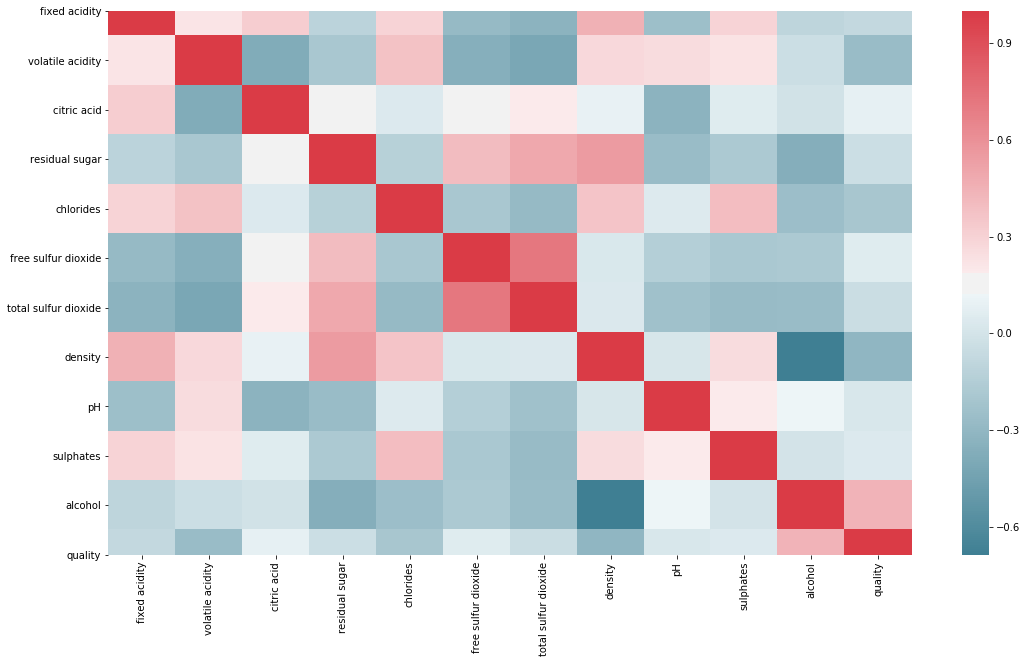

In [19]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Pairwise Plots - Show the scatter plots between all features in our dataset

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


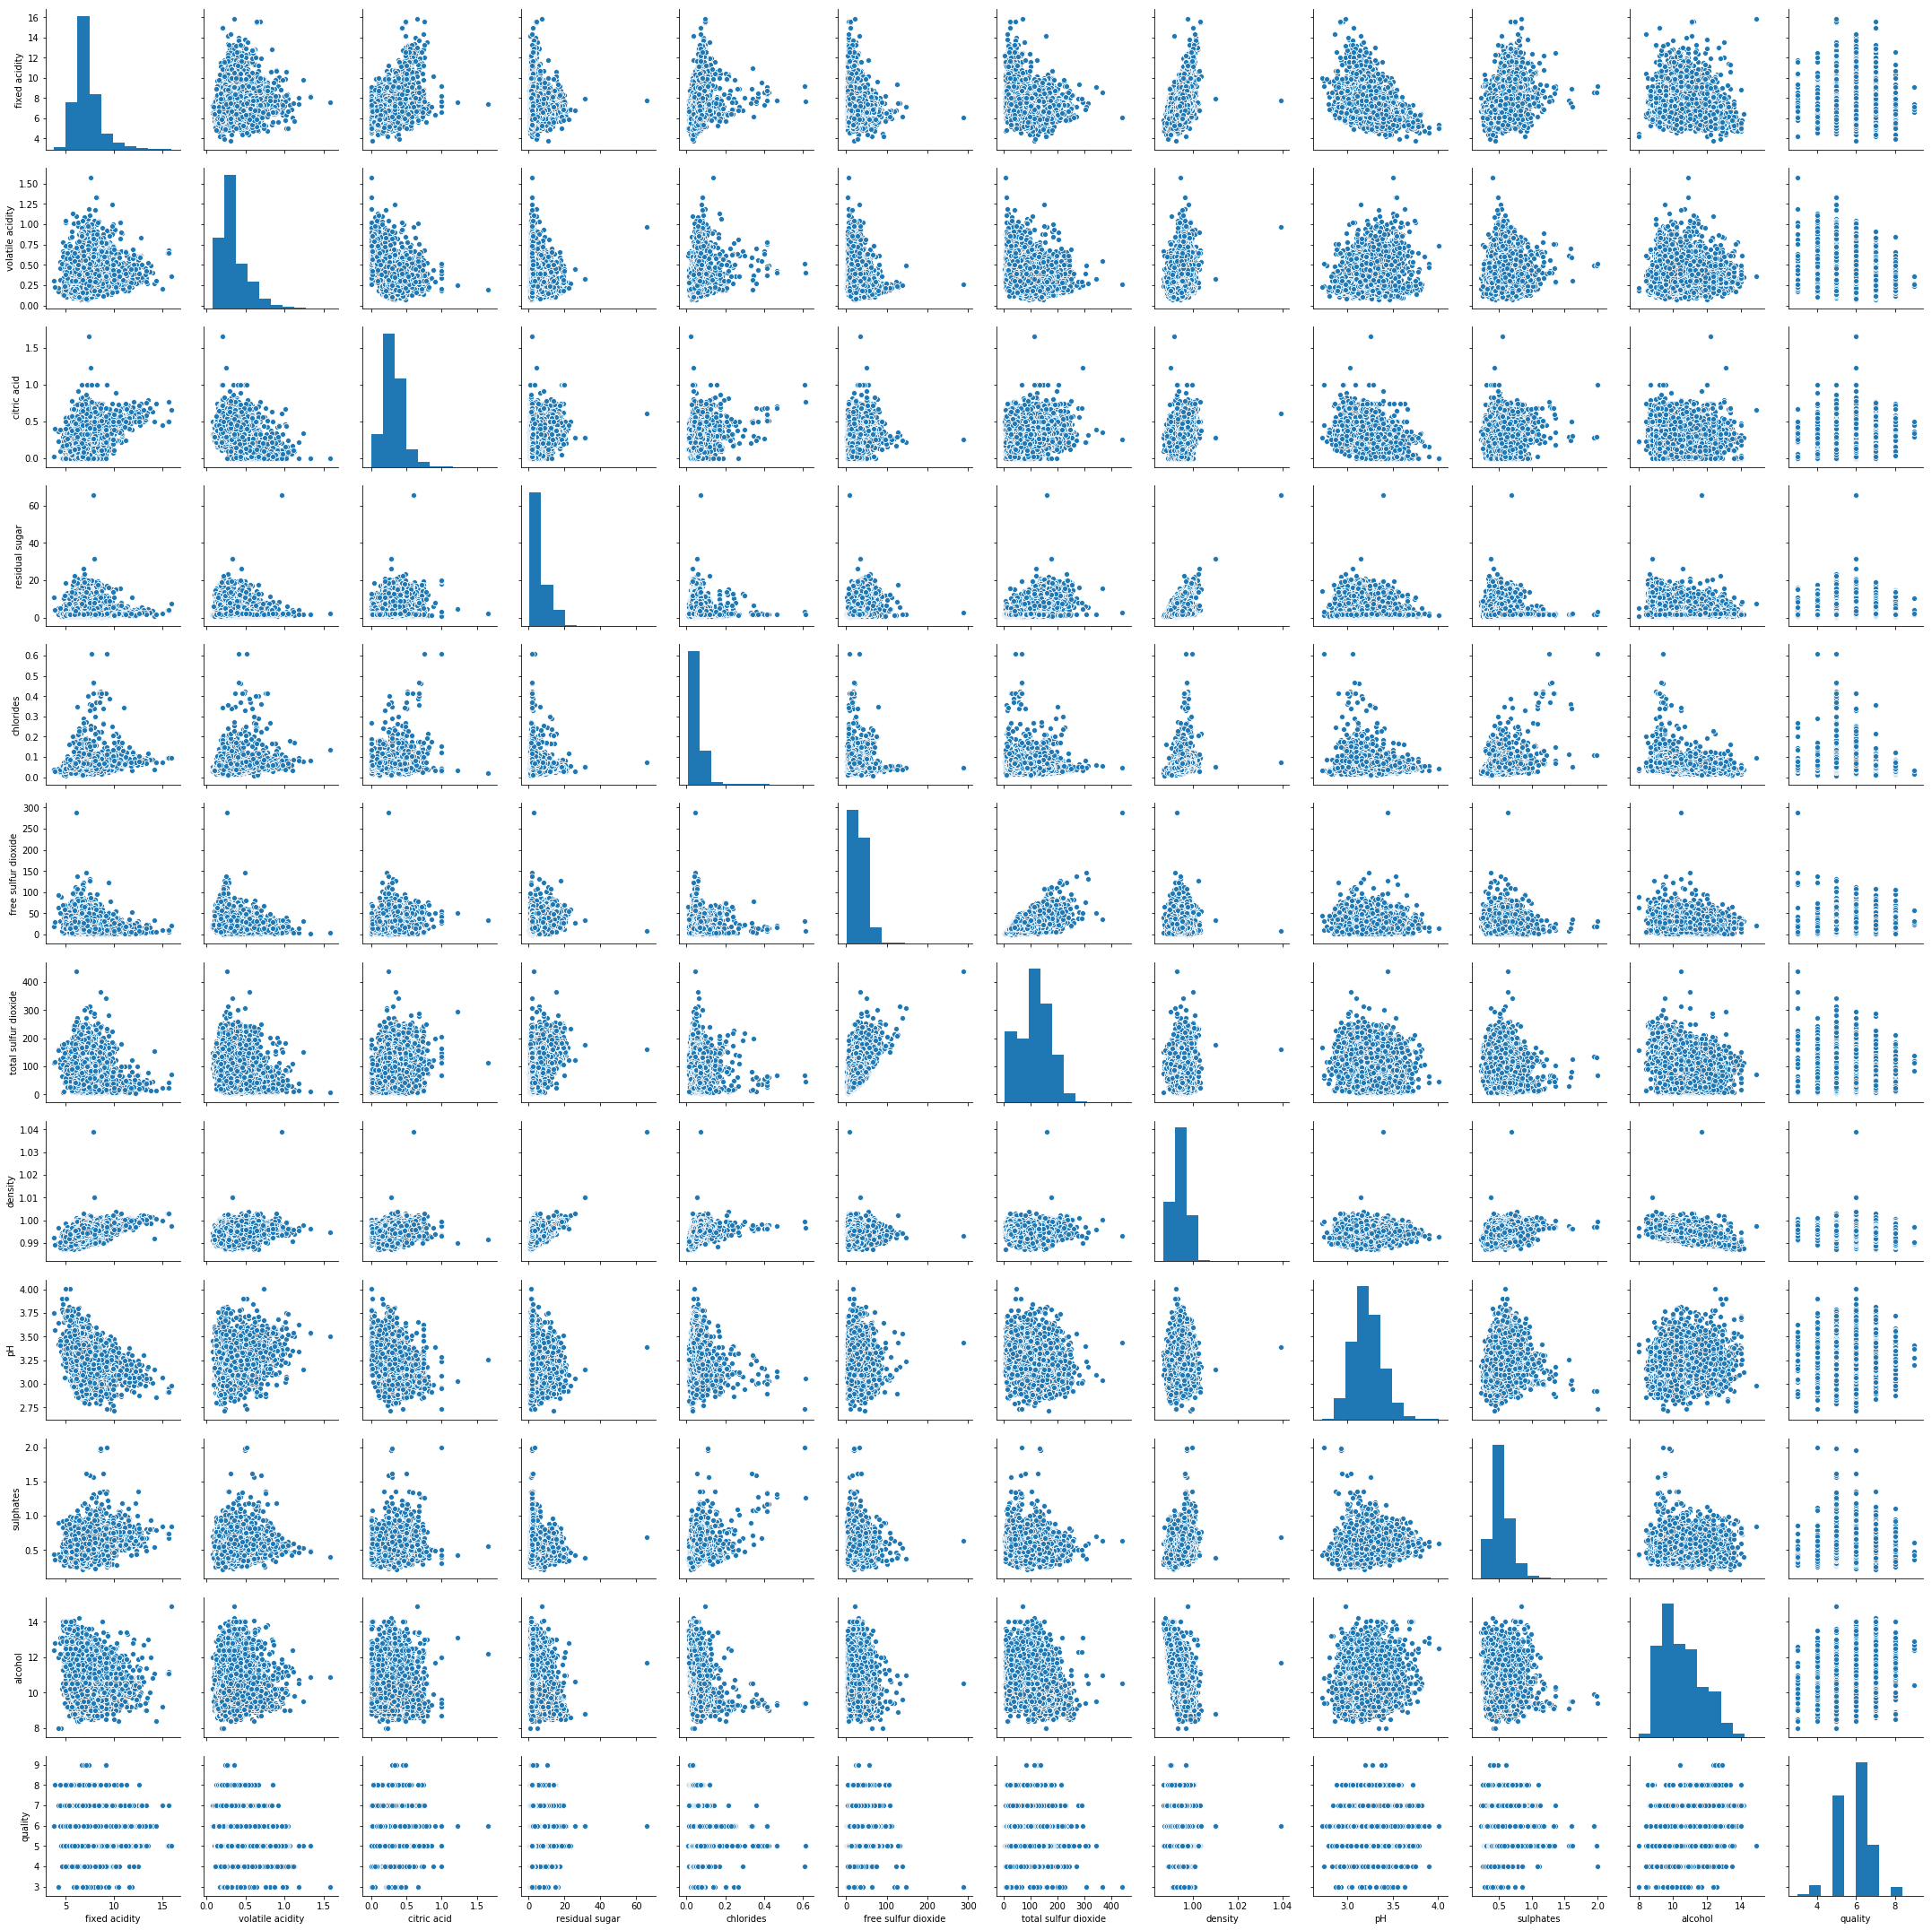

In [0]:
# Basic pair wise plot
g = sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


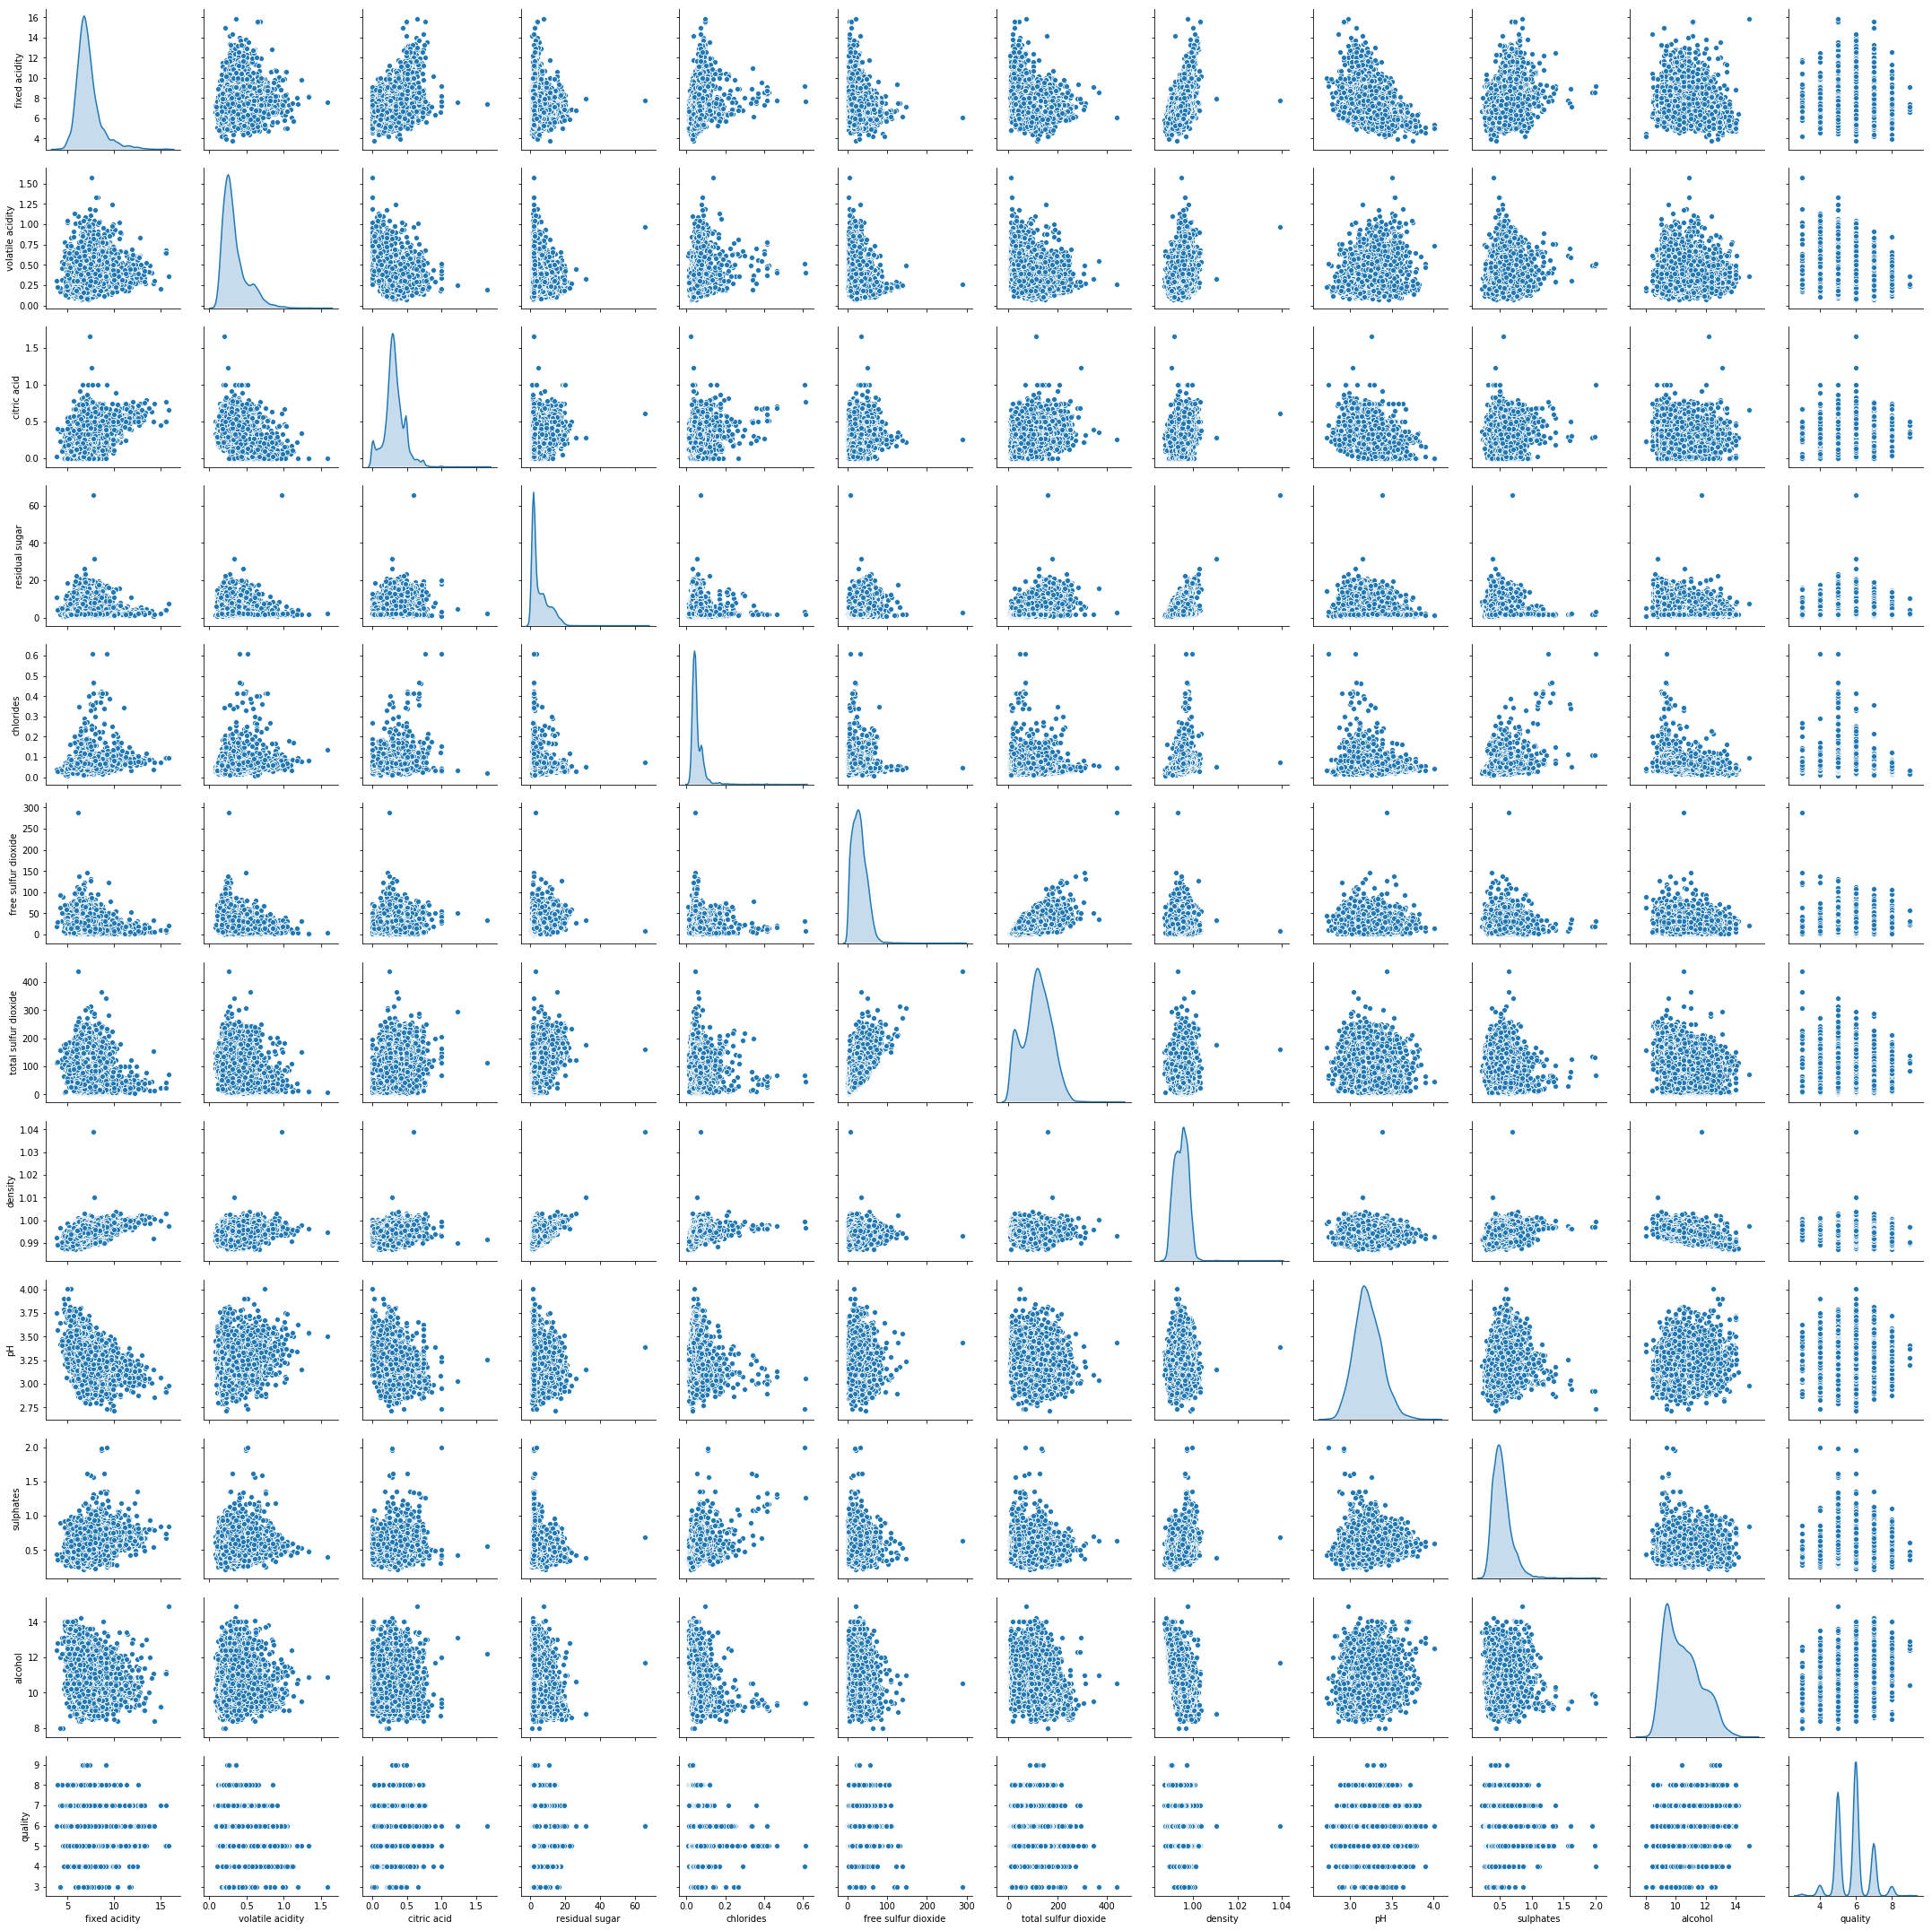

In [0]:
g = sns.pairplot(df, palette="husl", diag_kind="kde")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


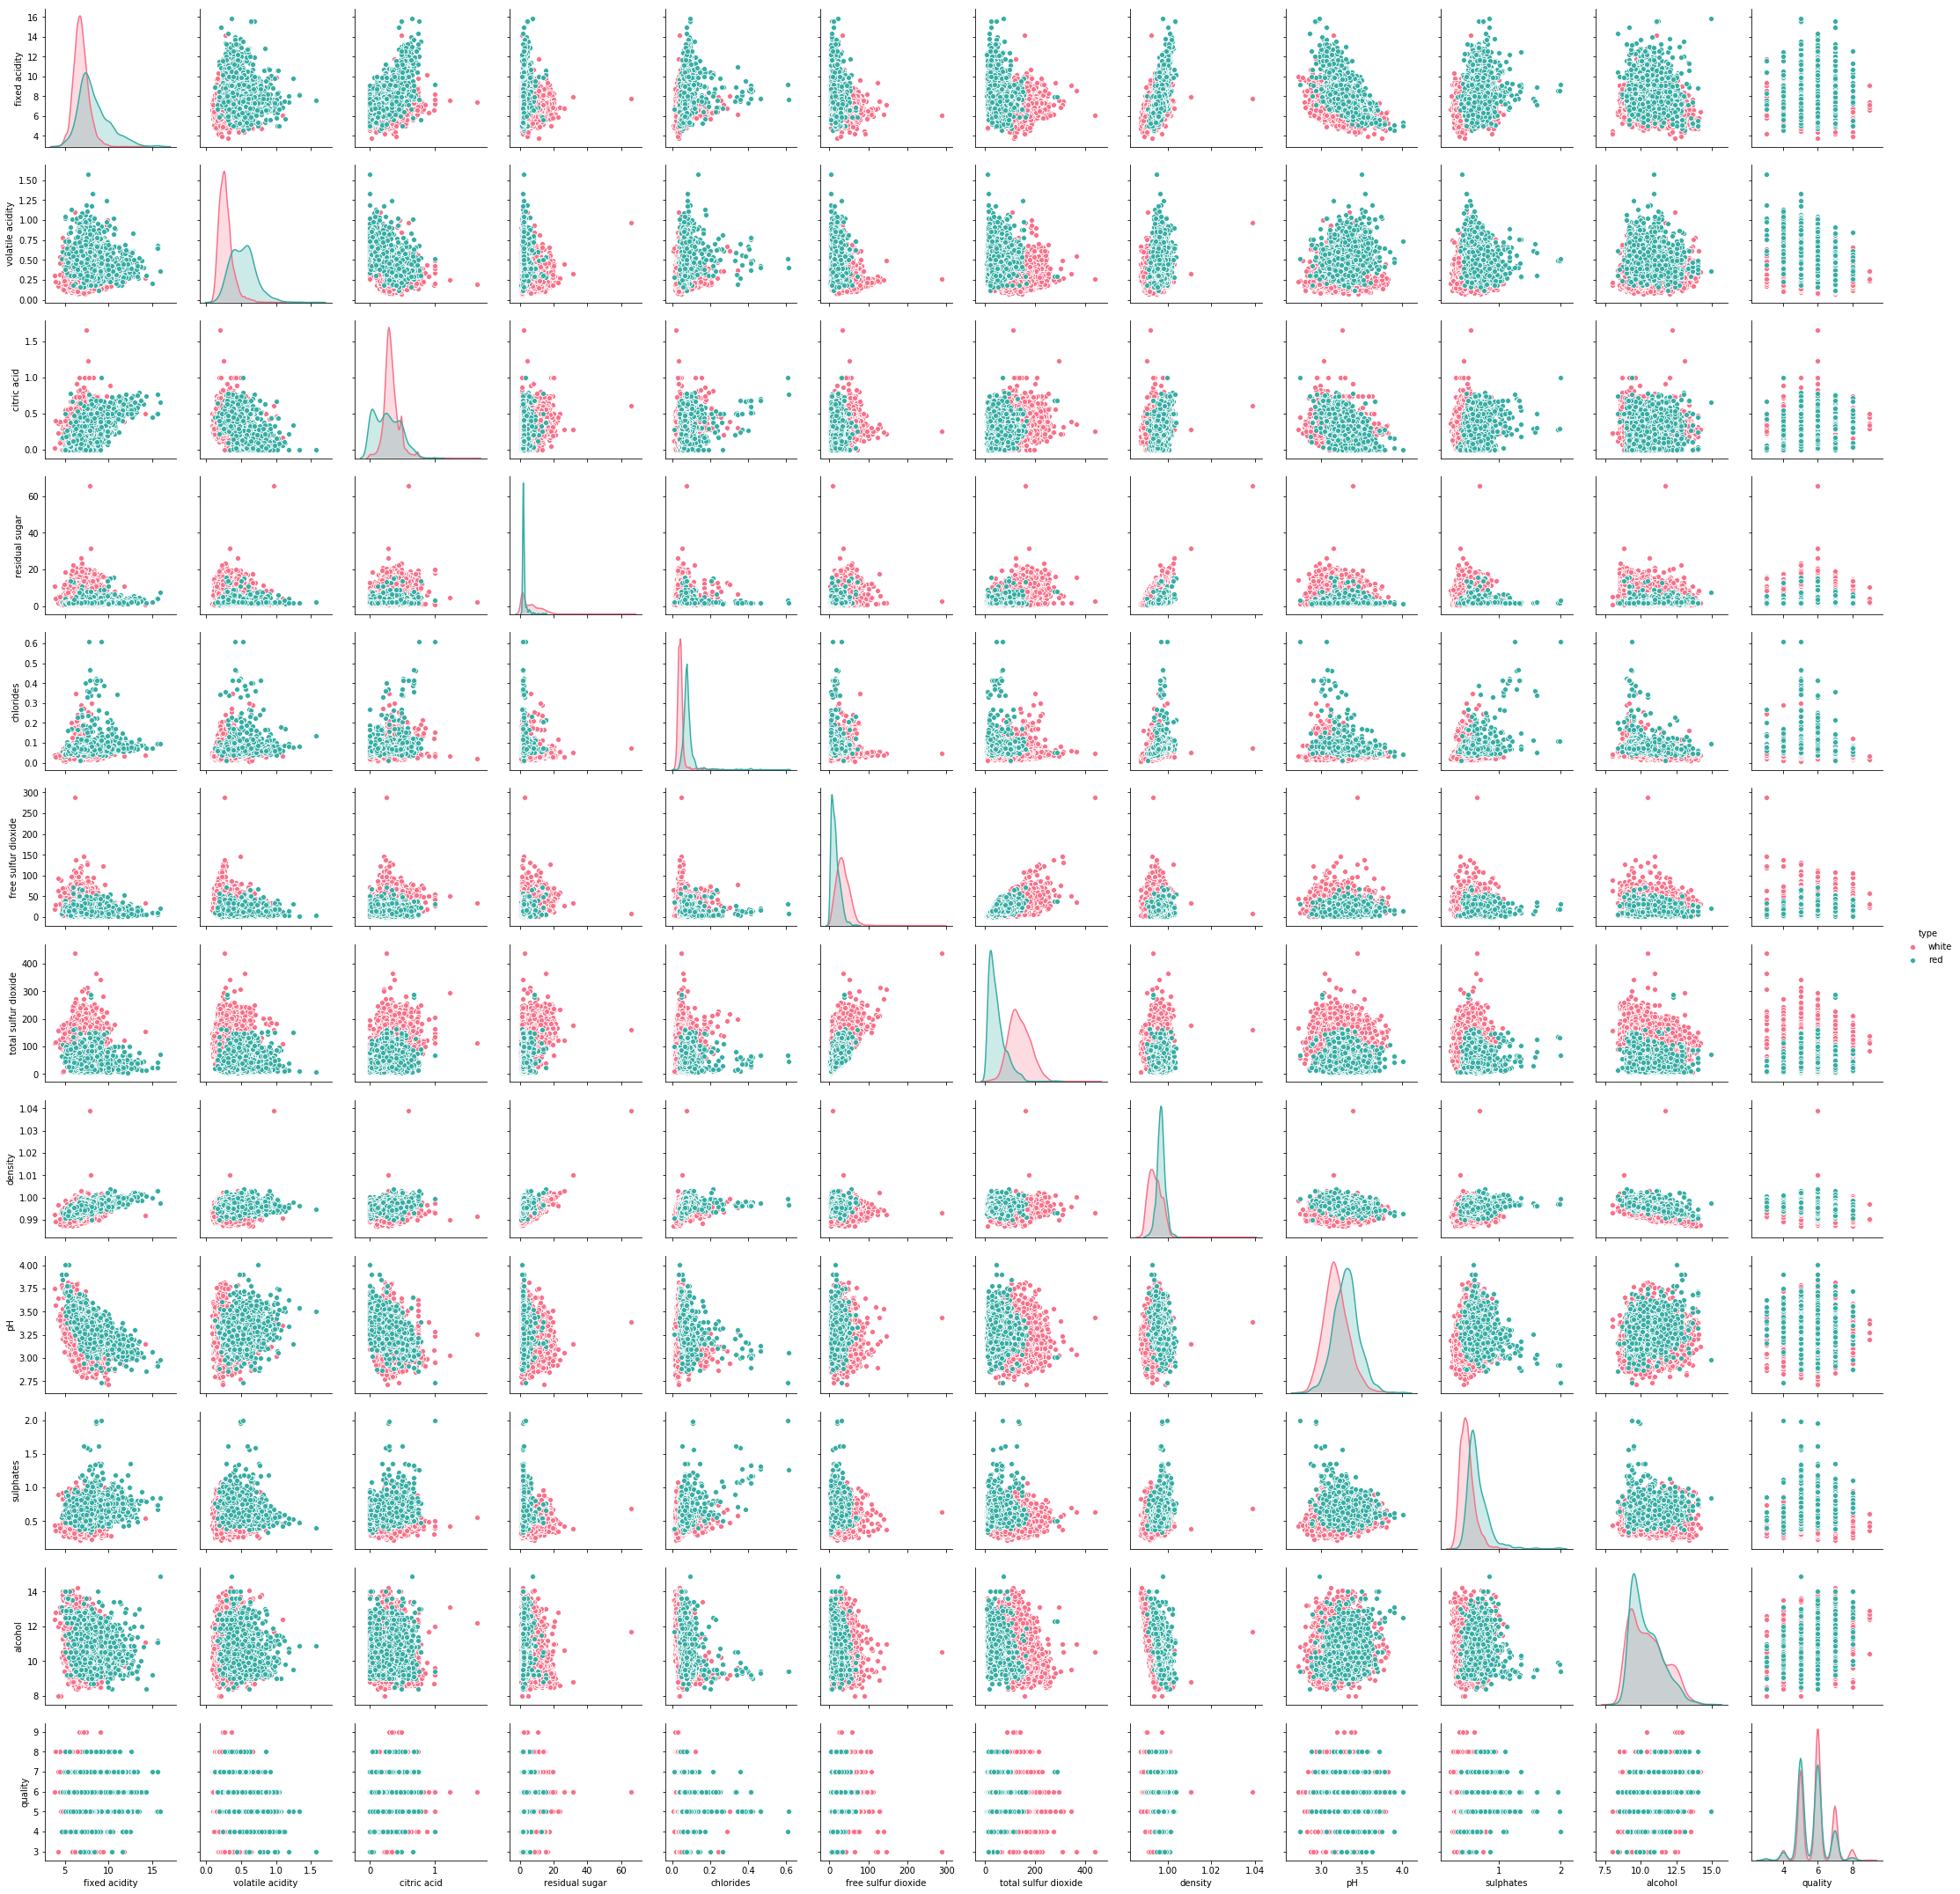

In [0]:
g = sns.pairplot(df, palette="husl", diag_kind="kde", hue='type')

In [0]:
df.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

# Z-Scores

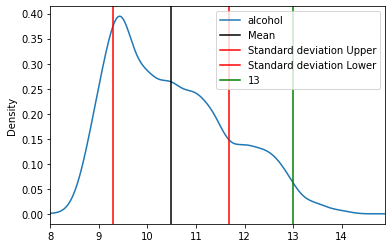

In [20]:
# First let's look at the Standard Deviation of our Alcohol Data

import pandas as pd
import matplotlib.pyplot as pltl


df['alcohol'].plot.kde(xlim = (df['alcohol'].min(), df['alcohol'].max()))

std = df['alcohol'].std(ddof = 0) # Meaning we divide by N and not (N-1)
mean = df['alcohol'].mean()

plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + std, color = 'Red', label = 'Standard deviation Upper')
plt.axvline(mean - std, color = 'Red', label = 'Standard deviation Lower')
plt.axvline(13, color = 'Green', label = '13')
plt.legend()


In [0]:
df['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

## Converting an entire distribution to its z-scores

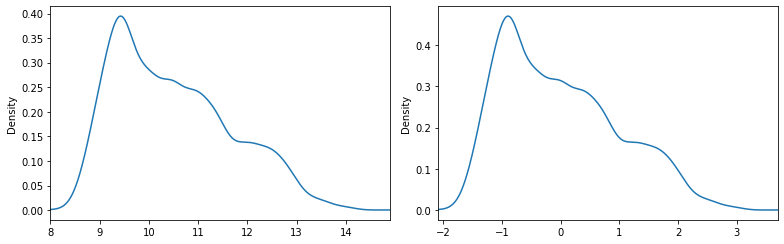

In [24]:
mean = df['alcohol'].mean()
std = df['alcohol'].std(ddof = 0)

df['z_scores'] = df['alcohol'].apply(lambda x: ((x - mean) / std))

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
df['alcohol'].plot.kde(xlim = (df['alcohol'].min(), df['alcohol'].max()))

plt.subplot(1,2,2)
df['z_scores'].plot.kde(xlim = (df['z_scores'].min(), df['z_scores'].max()))

plt.tight_layout() # otherwise the plots will overlay partially

In [25]:
z_mean_area = df['z_scores'].mean()
z_stdev_area = df['z_scores'].std(ddof = 0)
print(z_mean_area)
print(z_stdev_area)

-4.905973358136756e-14
1.0000000000000064
